# <font color = 'CornflowerBlue'>My Experience with Machine Learning</font>
My experience with machine learning is limited to Neural Networks and more specifically, Convolutional Neural Networks (CNN). During the summer of 2018, I worked on a small project with CRL at UT Austin where I learned and develop python scripts to implement training on AlexNet based CNN for different weights and input image bit vectors. I used a bit of TensorFlow and Keras to implement the scripts. Outside of CNNs, I have also looked into Spiking Neural Networks. 

I have a general understanding of machine learning from a mathematical standpoint (e.g. Batch vs Stochastic Gradient Descent, Kernels, SVM, Regression, Naive Bayes, etc.) I have minimal experience with packages such as SciKit Learn. Since I took Linear Algebra, Multivariable Calculus, and Differential Equations in high school, my theoretical knowledge of Machine Learning is a bit stronger than my practical expertise. 

# <font color = 'CornflowerBlue'>Introduction to the dataset</font>
The dataset comes from the UC Irvine database. The extraction was done by Barry Becker from the 1994 Census Database. The prediction task is the income cateogry (greater than $\$50$K or less than $\$50$K). Features include Age, Class of Work, Final Weight (Estimate of the number of people the census believes the entry is generalized to), Education, Education by Year, Marital Status, Occupation, Relationship, Race, Sex, Capital-Gain, Capital-Loss, Hours per week, and Native Country.


# <font color = 'CornflowerBlue'>Implementation of Classifiers</font>

Import statements from pandas, seaborn, matplotlib, and sklearn.

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC #Support Vector Classifier
from sklearn import svm #Support Vector Machine
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

## <font color = 'SeaGreen'> Reformating and Analyzing Data </font> 

In [2]:
income = pd.read_csv('adult.csv')

In [3]:
income.head()

,Age,Class of Work,Final Weight,Education,Education by Year,Marital Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours per week,Native Country,Income Category
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
income.describe()

,Age,Final Weight,Education by Year,Capital-Gain,Capital-Loss,Hours per week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                32561 non-null  int64 
 1   Class of Work      32561 non-null  object
 2   Final Weight       32561 non-null  int64 
 3   Education          32561 non-null  object
 4   Education by Year  32561 non-null  int64 
 5   Marital Status     32561 non-null  object
 6   Occupation         32561 non-null  object
 7   Relationship       32561 non-null  object
 8   Race               32561 non-null  object
 9   Sex                32561 non-null  object
 10  Capital-Gain       32561 non-null  int64 
 11  Capital-Loss       32561 non-null  int64 
 12  Hours per week     32561 non-null  int64 
 13  Native Country     32561 non-null  object
 14  Income Category    32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
income['Income Category'].replace([' <=50K', ' >50K'], [0, 1], inplace = True)
income['Class of Work'].replace([' Private', ' Self-emp-not-inc', ' Self-emp-inc', ' Federal-gov', ' Local-gov', ' State-gov', ' Without-pay', ' Never-worked'], [0, 1, 2, 3, 4, 5, 6, 7], inplace = True)
income['Marital Status'].replace(['Married-civ-spouse', 'Divorced', 'Never-married', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse'], [0, 1, 2, 3, 4, 5, 6], inplace = True)
income['Sex'].replace(['Male', 'Female'], [0, 1], inplace = True)
income['Occupation'].replace(['Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing', 'Transport-moving', 'Priv-house-serv', 'Protective-serv', 'Armed-Forces'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], inplace = True)
income['Education'].replace(['Bachelors', 'Some-college', '11th', 'HS-grad', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', '9th', '7th-8th', '12th', 'Masters', '1st-4th', '10th', 'Doctorate', '5th-6th', 'Preschool'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], inplace = True)
income['Relationship'].replace(['Wife', 'Own-child', 'Husband', 'Not-in-family', 'Other-relative', 'Unmarried'], [0, 1, 2, 3, 4, 5], inplace = True)
income['Race'].replace(['White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'Black'], [0, 1, 2, 3, 4], inplace = True)
income['Native Country'].replace(['United-States', 'Cambodia', 'England', 'Puerto-Rico', 'Canada', 'Germany', 'Outlying-US(Guam-USVI-etc)', 'India', 'Japan', 'Greece', 'South', 'China', 'Cuba', 'Iran', 'Honduras', 'Philippines', 'Italy', 'Poland', 'Jamaica', 'Vietnam', 'Mexico', 'Portugal', 'Ireland', 'France', 'Dominican-Republic', 'Laos', 'Ecuador', 'Taiwan', 'Haiti', 'Columbia', 'Hungary', 'Guatemala', 'Nicaragua', 'Scotland', 'Thailand', 'Yugoslavia', 'El-Salvador', 'Trinadad&Tobago', 'Peru', 'Hong', 'Holand-Netherlands'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], inplace = True)

In [7]:
income = income[income['Class of Work'] != '?']
income = income[income['Occupation'] != '?']
income = income[income['Native Country'] != '?']

In [8]:
income.head(10)

,Age,Class of Work,Final Weight,Education,Education by Year,Marital Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours per week,Native Country,Income Category
0,39,5,77516,0,13,2,8,3,0,0,2174,0,40,0,0
1,50,1,83311,0,13,0,4,2,0,0,0,0,13,0,0
2,38,0,215646,3,9,1,6,3,0,0,0,0,40,0,0
3,53,0,234721,2,7,0,6,2,4,0,0,0,40,0,0
4,28,0,338409,0,13,0,5,0,4,1,0,0,40,12,0
5,37,0,284582,10,14,0,4,0,0,1,0,0,40,0,0
6,49,0,160187,7,5,5,2,3,4,1,0,0,16,18,0
7,52,1,209642,3,9,0,4,2,0,0,0,0,45,0,1
8,31,0,45781,10,14,2,5,3,0,1,14084,0,50,0,1
9,42,0,159449,0,13,0,4,2,0,0,5178,0,40,0,1


## <font color = 'SeaGreen'> Data Visualization </font> 

I chose to visualize some of the features and the respective frequency of the income category to better understand the dataset.

In [9]:
income['Income Category'].value_counts()

0    22654
1     7508
Name: Income Category, dtype: int64

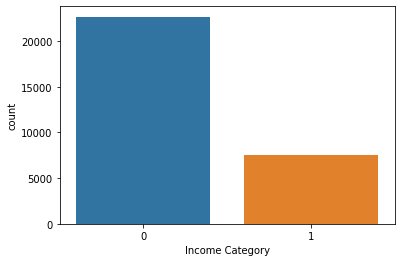

In [10]:
sns.countplot(income['Income Category'])

Text(0, 0.5, 'Frequency')

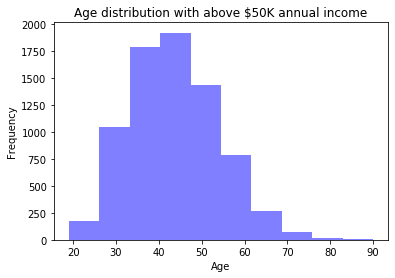

In [11]:
plt.hist(income[income["Income Category"]==1].Age.values, 10, facecolor='blue', alpha=0.5)
plt.title("Age distribution with above $50K annual income")
plt.xlabel("Age")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

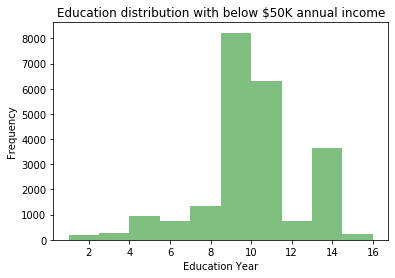

In [59]:
plt.hist(income[income["Income Category"]==0]["Education by Year"].values, 10, facecolor='green', alpha=0.5)
plt.title("Education distribution with below $50K annual income")
plt.xlabel("Education Year")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

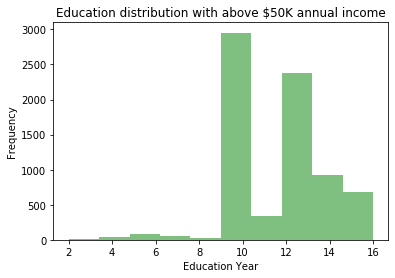

In [61]:
plt.hist(income[income["Income Category"]==1]["Education by Year"].values, 10, facecolor='green', alpha=0.5)
plt.title("Education distribution with above $50K annual income")
plt.xlabel("Education Year")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

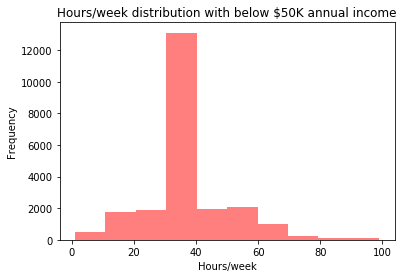

In [62]:
plt.hist(income[income["Income Category"]==0]["Hours per week"].values, 10, facecolor='red', alpha=0.5)
plt.title("Hours/week distribution with below $50K annual income")
plt.xlabel("Hours/week")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

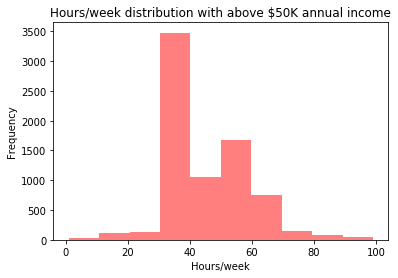

In [63]:
plt.hist(income[income["Income Category"]==1]["Hours per week"].values, 10, facecolor='red', alpha=0.5)
plt.title("Hours/week distribution with above $50K annual income")
plt.xlabel("Hours/week")
plt.ylabel("Frequency")

## <font color = 'SeaGreen'> Splitting the Dataset into a Training and Testing Set. </font> 

The *train_test_split* method from the model_selection package in sklearn ensures that both the features and the output (income category) are split. I chose to have the test size be 35% of the dataset allowing for 65% of the dataset to train the classifier

In [13]:
X = income.drop('Income Category', axis=1) #All of the features besides quality
y = income['Income Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

I applied a Standard Scaler to the data to ensure that the data is normally distributed and $\mu = 0$ and $\sigma = 1$. This is important because features such as *Final Weight* and *Capital Gain* have much larger values than *Relationship*, or *Race*. The model should not be skewed in favor of the large parameters. Each feature should be treated equally.

In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train[:5]

array([[-1.63666649, -0.49894997, -0.22409534, -0.40161329, -1.21756042,
         0.81245913,  0.42499252, -1.13607777, -0.37238476, -0.69180443,
        -0.14686997, -0.21743312, -1.73886654,  6.46837417],
       [-0.33997058, -0.49894997,  0.75448338, -0.6932351 , -0.04239149,
         0.81245913,  1.09592251, -1.13607777, -0.37238476,  1.44549522,
        -0.14686997, -0.21743312, -0.07490793, -0.26843863],
       [ 0.04141056,  0.18800969,  1.39424134,  1.9313612 ,  1.52450043,
        -0.89726113, -1.25233245, -0.32201286, -0.37238476, -0.69180443,
        -0.14686997, -0.21743312,  1.17306103, -0.26843863],
       [-0.33997058, -0.49894997,  0.18818156, -0.6932351 , -0.04239149,
        -0.89726113, -1.58779745, -0.32201286,  2.9591223 , -0.69180443,
        -0.14686997, -0.21743312, -0.07490793, -0.26843863],
       [ 0.42279171,  2.24888869, -0.49810685,  1.9313612 ,  1.52450043,
        -0.89726113,  0.08952753, -0.32201286, -0.37238476, -0.69180443,
         1.94914465, -0.21

## <font color = 'SeaGreen'> Random Forest Classifier </font> 

In [15]:
RFC = RandomForestClassifier(n_estimators=150)
RFC.fit(X_train, y_train)
pred_RFC = RFC.predict(X_test)

In [16]:
print(classification_report(y_test, pred_RFC))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      5656
           1       0.75      0.62      0.68      1885

    accuracy                           0.85      7541
   macro avg       0.81      0.78      0.79      7541
weighted avg       0.85      0.85      0.85      7541



In [18]:
print(confusion_matrix(y_test, pred_RFC))

[[5264  392]
 [ 716 1169]]


In [20]:
acc = accuracy_score(y_test, pred_RFC)
acc

0.8530698846306856

## <font color = 'SeaGreen'> Support Vector Machine Classifier </font> 

In [21]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [22]:
print(classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      5656
           1       0.76      0.56      0.64      1885

    accuracy                           0.85      7541
   macro avg       0.81      0.75      0.77      7541
weighted avg       0.84      0.85      0.84      7541



In [23]:
print(confusion_matrix(y_test, pred_clf))

[[5324  332]
 [ 833 1052]]


In [53]:
acc = accuracy_score(y_test, pred_clf)
acc

0.845511205410423

## <font color = 'SeaGreen'> Multi-layer Perceptron Classifier </font> 

In [25]:
MLP = MLPClassifier(hidden_layer_sizes = (14, 14, 14), max_iter=1000)
MLP.fit(X_train, y_train)
pred_MLP = MLP.predict(X_test)

In [26]:
print(classification_report(y_test, pred_MLP))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      5656
           1       0.71      0.66      0.68      1885

    accuracy                           0.85      7541
   macro avg       0.80      0.78      0.79      7541
weighted avg       0.84      0.85      0.84      7541



In [27]:
print(confusion_matrix(y_test, pred_MLP))

[[5153  503]
 [ 650 1235]]


In [28]:
acc = accuracy_score(y_test, pred_MLP)
acc

0.8471025062988994

## <font color = 'SeaGreen'> Decision Tree Classifier </font> 

In [29]:
DTC = DecisionTreeClassifier(random_state=100, max_depth=5)
DTC.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [30]:
train_predictions = DTC.predict(X_train)
pred_DTC = DTC.predict(X_test)
print(confusion_matrix(y_test, pred_DTC))

[[5385  271]
 [ 898  987]]


In [31]:
print(classification_report(y_test, pred_DTC))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5656
           1       0.78      0.52      0.63      1885

    accuracy                           0.84      7541
   macro avg       0.82      0.74      0.77      7541
weighted avg       0.84      0.84      0.83      7541



In [32]:
acc = accuracy_score(y_test, pred_DTC)
acc

0.8449807717809309

## <font color = 'SeaGreen'> Hyperparameter Tuning (Support Vector Machine) </font> 

In [33]:
score = cross_val_score(tree_clf, X_train, y_train, cv = 5, scoring = 'f1_macro')
score.mean()

0.7559805973263133

In [34]:
#Checking to see if the Decision Tree is overfitted. 
print("The Training F1 Score is", f1_score(train_predictions, y_train))
print("The Testing F1 Score is", f1_score(pred_dtc, y_test))

The Training F1 Score is 0.6188070929607739
The Testing F1 Score is 0.6280623608017818


The results below for the GridSearchCV demonstrate the scores from the five different cross-validation trials. The RBF kernel with a C value of 1 seemed to produce the best mean test score but each of the five scores is still very close to each other. 

In [47]:
GSCV = GridSearchCV(svm.SVC(gamma = "auto"), {
    'C': [1, 10, 20],
    'kernel': ['rbf', 'linear']
}, cv = 5, return_train_score = False)

GSCV.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 20], 'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [49]:
GSCV.cv_results_

{'mean_fit_time': array([ 9.44090753, 11.50188084, 13.94156656, 40.65536585, 16.23147578,
        71.63549361]),
 'std_fit_time': array([0.81035446, 0.13484138, 0.21015353, 0.80159731, 1.27727564,
        4.04634212]),
 'mean_score_time': array([1.33945813, 0.69874735, 1.36595359, 0.69614177, 1.3671536 ,
        0.70673208]),
 'std_score_time': array([0.12649319, 0.00381951, 0.00560563, 0.0031446 , 0.0054026 ,
        0.01420667]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linea

The results below for the RandomSearchCV demonstrate the scores from the two iterations. The RBF kernel with a C value of 1 seemed to produce the best mean test score. I chose to use two iterations to speed up the process. 

In [44]:
RS = RandomizedSearchCV(svm.SVC(gamma = "auto"), {
    'C': [1, 10, 20],
    'kernel': ['rbf', 'linear']
}, cv = 5, return_train_score = False, n_iter=2)

RS.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='auto', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=2, n_jobs=None,
                   param_distributions={'C': [1, 10, 20],
                                        'kernel': ['rbf', 'linear']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [45]:
RS.cv_results_

{'mean_fit_time': array([ 9.87321062, 70.93206229]),
 'std_fit_time': array([0.40554098, 3.75435546]),
 'mean_score_time': array([1.40964532, 0.69953771]),
 'std_score_time': array([0.01248228, 0.00311803]),
 'param_kernel': masked_array(data=['rbf', 'linear'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_C': masked_array(data=[1, 20],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'kernel': 'rbf', 'C': 1}, {'kernel': 'linear', 'C': 20}],
 'split0_test_score': array([0.84287293, 0.83911602]),
 'split1_test_score': array([0.83819629, 0.83399646]),
 'split2_test_score': array([0.84703802, 0.84350133]),
 'split3_test_score': array([0.84504863, 0.84106985]),
 'split4_test_score': array([0.84416446, 0.83642794]),
 'mean_test_score': array([0.84346406, 0.83882232]),
 'std_test_score': array([0.00296221, 0.00334821]),
 'rank_test_score': array([1, 2])}

# <font color = 'CornflowerBlue'>Summary and Analysis</font>

For this project, I chose to use the census income dataset from the UC Irvine Dataset Repository. One of the main problems with the dataset was that about 1% of the data was incomplete. Most of my time was spent in cleaning and preparing the dataset for the four different classification models. I chose to run the following four classification models: Random Forest Classifier, Support Vector Machine Classifier, Multi-layer Perceptron (Neural-Network Model), and the Decision Tree Classifier. The Random Forest Classifier produced the highest accuracy (0.8531) while the Decision Tree Classifier produced the lowest accuracy (0.8449). However, all four of the accuracy values were very close to each other (IQR = 0.00649). This is perhaps due to the large size of the data set and the overfitting of models to the data (refer to the low F1 testing score as a potential indicator of overfitting). 

As a result, I tried to optimize the classifier using cross-validation techniques present in the GridSearchCV object from the Sklearn Model Selection package. Since the dataset is very large, and GridSearchCV studies every permutation of the parameter list using K-Fold Cross-Validation, I limited the 'C' (cross-validation generator) and 'Kernel' (Function type) parameters. In both instances, I received the highest mean test score when C = 1, and the Kernel was set to the RBF function. 